<a href="https://colab.research.google.com/github/maxindian/Natural-Language-Processing/blob/master/KPCA_mxd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[5.89831214 5.10991178]


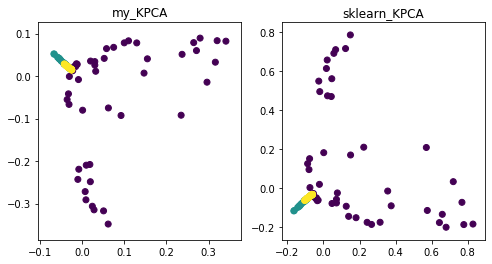

In [0]:
from sklearn.datasets import load_iris
from sklearn.decomposition import KernelPCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

## Author: Xindian Ma 
def sigmoid(x, coef = 0.25):
  x = np.dot(x, x.T)
  return np.tanh(coef*x+1)

def linear(x):
  x = np.dot(x,x.T)
  return x
def rbf(x,gamma = 15):
  sq_dists = pdist(x,'sqeuclidean')
  mat_seq_dists = squareform(sq_dists)
  return np.exp(-gamma*mat_seq_dists)
def Kpca(data,n_dims = 2, kernel=rbf):
  K = kernel(data)

  N = K.shape[0]
  one_n = np.ones((N,N))/N
  K = K- one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)

  eig_values, eig_vector = np.linalg.eig(K)
  idx = eig_values.argsort()[::-1]
  eigval = eig_values[idx][:n_dims]
  eigvector = eig_vector[:,idx][:,:n_dims]
  print(eigval)
  vi = eigvector/eigval.reshape(-1,n_dims)
  data_n = np.dot(K,vi)
  return data_n

if __name__=="__main__":
  data = load_iris().data
  Y = load_iris().target
  data_1 = Kpca(data, kernel=rbf)

  sklearn_kpca = KernelPCA(n_components=2, kernel='rbf',gamma=15)
  data_2 = sklearn_kpca.fit_transform(data)

  plt.figure(figsize=(8,4))
  plt.subplot(121)
  plt.title("my_KPCA")
  plt.scatter(data_1[:,0],data_1[:,1],c=Y)

  plt.subplot(122)
  plt.title("sklearn_KPCA")
  plt.scatter(data_2[:,0],data_2[:,1], c=Y)
  plt.show()
